En este trabajo se va a realizar un análisis estadístico del siguiente conjunto de datos publicado en https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance

Este conjunto de datos mide el tiempo de ejecución de un producto matriz-matriz A*B = C, donde todas las matrices tienen un tamaño de 2048 x 2048, utilizando un kernel de GPU SGEMM parametrizable con 241600 combinaciones de parámetros posibles. Para cada combinación probada, se realizaron 4 ejecuciones y sus resultados se muestran en las 4 últimas columnas. Todos los tiempos se miden en milisegundos.

Hay 14 parámetros, los primeros 10 son ordinales y solo pueden tomar como valor potencias de dos, las 4 últimas variables son binarias. De las 1327104 combinaciones de parámetros totales, solo 241600 son factibles (debido a varias restricciones del kernel). Este conjunto de datos contiene los resultados de todas estas combinaciones factibles.

El experimento se ejecutó en una máquina con Ubuntu 16.04 Linux con un procesador Intel Core i5 (3,5 GHz), 16 GB de RAM y una GPU NVidia Geforce GTX 680 de 4 GB GF580 GTX-1,5 GB. Usamos el kernel 'gemm_fast' de la librería 'CLTune' de OpenCL. 

A continuación se muestra la información de los distintos atributos:

- Variables Independientes:

1-2. MWG, NWG: per-matrix 2D tiling at workgroup level: {16, 32, 64, 128} (integer)

3. KWG: inner dimension of 2D tiling at workgroup level: {16, 32} (integer)

4-5. MDIMC, NDIMC: local workgroup size: {8, 16, 32} (integer)

6-7. MDIMA, NDIMB: local memory shape: {8, 16, 32} (integer)

8. KWI: kernel loop unrolling factor: {2, 8} (integer)

9-10. VWM, VWN: per-matrix vector widths for loading and storing: {1, 2, 4, 8} (integer)

11-12. STRM, STRN: enable stride for accessing off-chip memory within a single thread: {0, 1} (categorical)

13-14. SA, SB: per-matrix manual caching of the 2D workgroup tile: {0, 1} (categorical)

- Salida:
15-18. Run1, Run2, Run3, Run4: tiempos de ejecución en milisegundos para 4 ejecuciones independientes utilizando los mismos parámetros. Varían entre 13.25 y 3397.08.


In [ ]:
!pip install pdflatex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! sudo apt-get install texlive-latex-recommended 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import pandas as pd

# Load data/sgemm_product.csv dataset into pandas dataframe
sgemm_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sgemm_product.csv')

# Print the first 5 rows of the dataframe
sgemm_df.head()


,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


# Análisis básico

In [ ]:
# Calculate the mean of the last 4 columns along the rows
mean_run = sgemm_df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)

# Assign the result to a new column in the DataFrame
sgemm_df['Mean Run (ms)'] = mean_run

sgemm_df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)','Mean Run (ms)']].describe()

,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Mean Run (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,217.647852,217.579536,217.532756,217.527669,217.571953
std,369.012422,368.677309,368.655118,368.677413,368.750161
min,13.290000,13.250000,13.360000,13.370000,13.317500
25%,40.660000,40.710000,40.660000,40.640000,40.667500
50%,69.825000,69.930000,69.790000,69.820000,69.790000
75%,228.530000,228.310000,228.320000,228.320000,228.387500
max,3339.630000,3375.420000,3397.080000,3361.710000,3341.507500


In [ ]:
# Calculate the mean of the last 4 columns along the rows
mean_run = sgemm_df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)

# Assign the result to a new column in the DataFrame
sgemm_df['Mean Run (ms)'] = mean_run

# Print the first 5 rows of the updated DataFrame
#print(sgemm_df.head())

mean_run.describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
dtype: float64

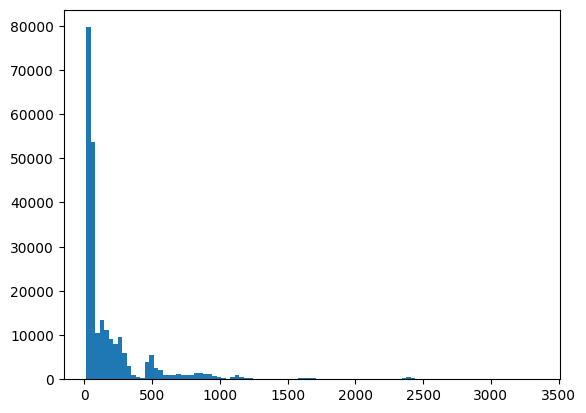

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

plt.hist(sgemm_df[['Mean Run (ms)']], bins=100)
plt.show()


In [ ]:
print(matplotlib.pyplot.get_backend())


module://matplotlib_inline.backend_inline


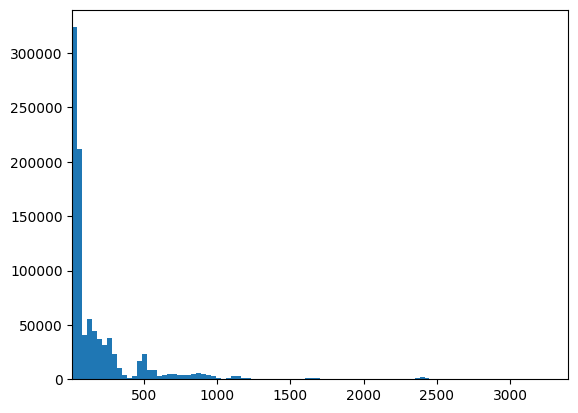

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])

plt.hist(values, bins=100)
# Set the lower and upper limits of the x-axis
plt.xlim([values.min(), values.max()])
histo1 = plt.show()


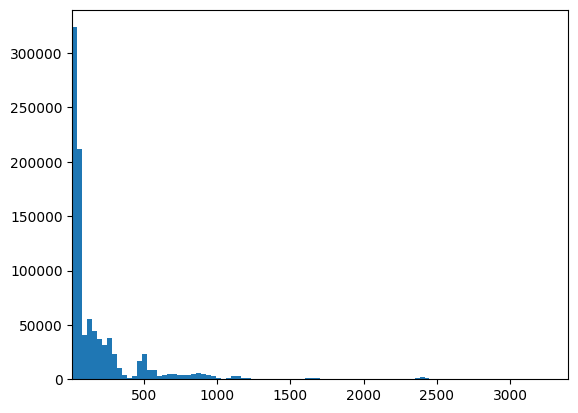

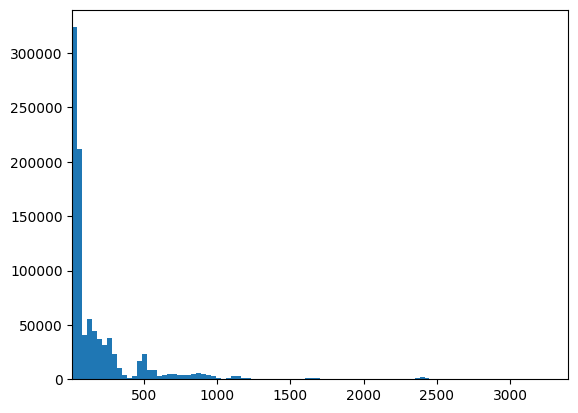

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])

plt.hist(values, bins=100)
# Set the lower and upper limits of the x-axis
plt.xlim([values.min(), values.max()])
plt.show()

values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])
plt.hist(values, bins=100)
# Set the lower and upper limits of the x-axis
plt.xlim([values.min(), values.max()])
plt.show()

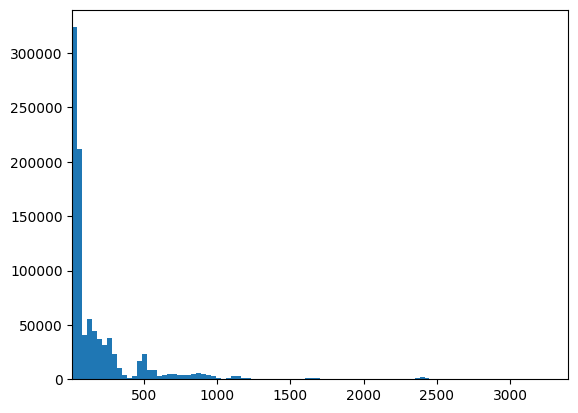

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Concatenate the values from the last 4 columns into a single array
values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])

# Create a histogram of the values
plt.hist(values, bins=100)

# Set the lower and upper limits of the x-axis
plt.xlim([values.min(), values.max()])

plt.show()

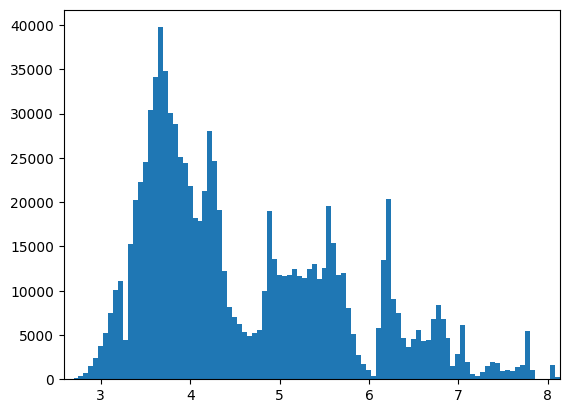

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Concatenate the values from the last 4 columns into a single array
values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])

# Take the logarithm of the values
log_values = np.log(values)

# Create a histogram of the values
plt.hist(log_values, bins=100)

# Set the lower and upper limits of the x-axis
plt.xlim([log_values.min(), log_values.max()])

plt.show()

El histograma nos muestra una distribución no normal. Se parece más a una distribución geométrica, pero teniendo en cuenta el origen de los datos esto no tiene sentido. Con esta representación es complicado sacar ninguna conclusión de la distribución de los datos, vamos a probar a continuación a tomar logaritmos.

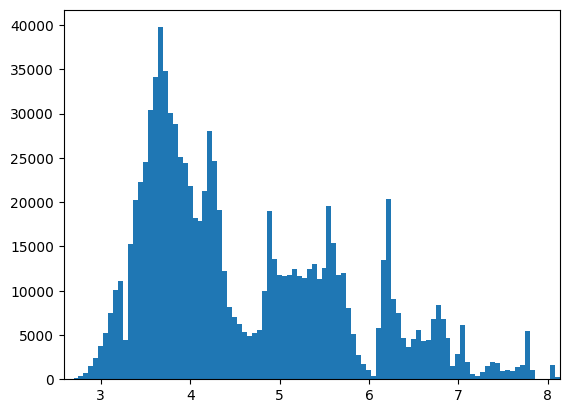

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib.use("pgf")
#plt.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})
# Concatenate the values from the last 4 columns into a single array
values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])

# Take the logarithm of the values
log_values = np.log(values)

# Create a histogram of the values
plt.hist(log_values, bins=100)

# Set the lower and upper limits of the x-axis
plt.xlim([log_values.min(), log_values.max()])

plt.show()
#plt.savefig('histogram-runs-log.pgf')

La distribución Normal es una distribución continua de probabilidad. Es la distribución de probabilidad más utilizada debido a que es la que siguen muchas variables en la naturaleza y a que es la base de la inferencia estadística. Muchas pruebas estadísticas requieren como condición de aplicación que los datos no sean diferentes de una Normal. Por ello tienen gran importancia las pruebas de comprobación de normalidad. Existen pruebas gráficas y otras numéricas. Las más utilizadas son:

b) Representar un histograma y comprobar la forma de campana.

c) Comprobar que la distribución es simétrica y mesocúrtica. Se puede hacer comprobando que los coeficientes de asimetría (CA) y de apuntamiento o curtosis (CC) no son significativamente diferentes de 0 mediante sus intervalos de confianza del 95%, o bien comprobando que los coeficientes tipificados de asimetría y curtosis (cociente entre el coeficiente su error estándar) están comprendidos entre ±2.

d) Utilizar pruebas de bondad de ajuste como la prueba de Kolmogorov-Smirnov (K-S). Se basan en comparar la distribución acumulada de los valores de la muestra observada con la distribución acumulada que se obtendría en el supuesto que siguiera una distribución Normal con la misma media y varianza. Si en la prueba de K-S se obtienen valores de P<0,05 la distribución difiere significativamente de una Normal.


In [ ]:
# Comprobar que la distribución es simétrica y mesocúrtica
from scipy import stats

# Calculate the skewness and kurtosis of the log_values
skewness = stats.skew(log_values)
kurtosis = stats.kurtosis(log_values)

print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')

Skewness: 0.78
Kurtosis: -0.29


The Kolmogorov-Smirnov (K-S) test is a non-parametric test that can be used to compare your sample distribution with a reference distribution. In your case, you want to compare your sample distribution with a normal distribution with the same mean and standard deviation as your sample.

In [ ]:
# prueba de Kolmogorov-Smirnov
from scipy import stats

# Calculate the mean and standard deviation of the log_values
mean = np.mean(log_values)
std = np.std(log_values)

# Perform the K-S test
ks_stat, p_value = stats.kstest(log_values, 'norm', args=(mean, std))

print(f'K-S statistic: {ks_stat:.2f}')
print(f'p-value: {p_value:.2f}')

K-S statistic: 0.14
p-value: 0.00


The K-S statistic measures the maximum difference between the cumulative distribution functions of your sample and the reference distribution. The p-value measures the probability of observing a K-S statistic as extreme as the one you calculated, assuming that your sample comes from the reference distribution.

If the p-value is below a certain significance level (e.g., 0.05), you can reject the null hypothesis that your sample comes from the reference distribution. In other words, if the p-value is low, it suggests that your data may not follow a normal distribution.

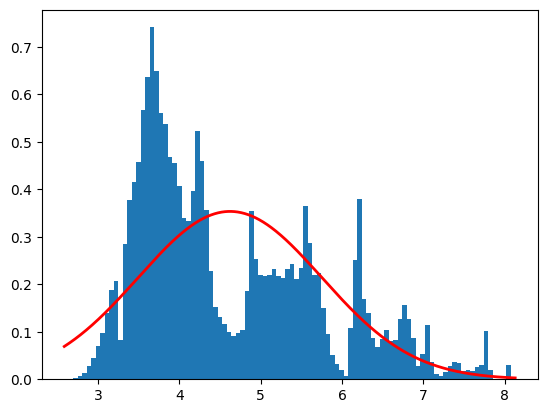

In [ ]:
from scipy import stats

# Calculate the mean and standard deviation of the log_values
mean = np.mean(log_values)
std = np.std(log_values)

# Create a histogram of the log_values
plt.hist(log_values, bins=100, density=True)

# Create an array of x-values for plotting the PDF
x = np.linspace(log_values.min(), log_values.max(), 1000)

# Calculate the PDF of the reference normal distribution
pdf = stats.norm.pdf(x, mean, std)

# Plot the PDF
plt.plot(x, pdf, 'r', linewidth=2)

plt.show()

Las pruebas anteriores demuestran que nuestro conjunto de datos no sigue una distribución normal.

In [ ]:
import pandas as pd

# Load data/sgemm_product.csv dataset into pandas dataframe
sgemm_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sgemm_product.csv')

# Print the first 5 rows of the dataframe
sgemm_df.head()



,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
df = sgemm_df
# Melt the last 4 columns into a single column
melted_df = pd.melt(df, id_vars=df.columns[:-4], value_vars=['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], var_name='Run', value_name='Time (ms)')

# Drop the 'Run' column
final_df = melted_df.drop('Run', axis=1)

# Print the first 5 rows of the final DataFrame
final_df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Time (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13


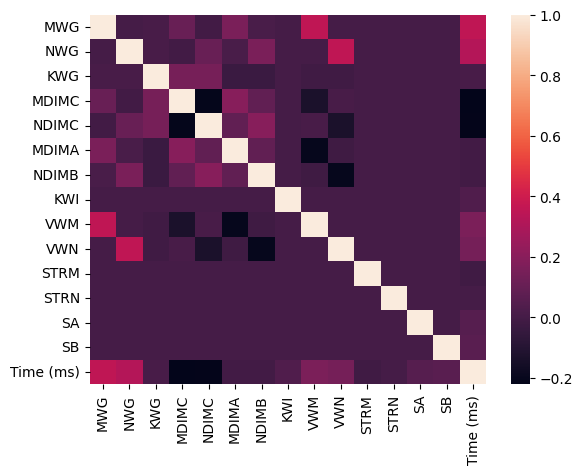

In [ ]:
import seaborn as sns
#matplotlib.use("pgf")
#plt.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})
# Select only the columns corresponding to the independent variables
independent_vars = final_df

# Calculate the correlation matrix
corr_matrix = independent_vars.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix)

# Show the heatmap
plt.show()
#plt.savefig("corrmat.pgf")

In [ ]:
import pandas as pd


# Calcula la matriz de correlación
corr_matrix = final_df.corr()

# Selecciona la última fila
last_row = corr_matrix.iloc[-1]

# Muestra la última fila
print(last_row)

# Muestra la matriz de correlación
#print(corr_matrix)

MWG          0.351805
NWG          0.320455
KWG          0.011229
MDIMC       -0.221093
NDIMC       -0.214592
MDIMA       -0.007035
NDIMB       -0.008706
KWI          0.032570
VWM          0.164271
VWN          0.144743
STRM        -0.012586
STRN        -0.000108
SA           0.051974
SB           0.063962
Time (ms)    1.000000
Name: Time (ms), dtype: float64


Para mostrar una gráfica que muestre el tiempo de ejecución en función del valor que toma el primer parámetro (MWG), puedes utilizar la librería matplotlib en Python. A continuación te muestro un ejemplo de cómo hacerlo:

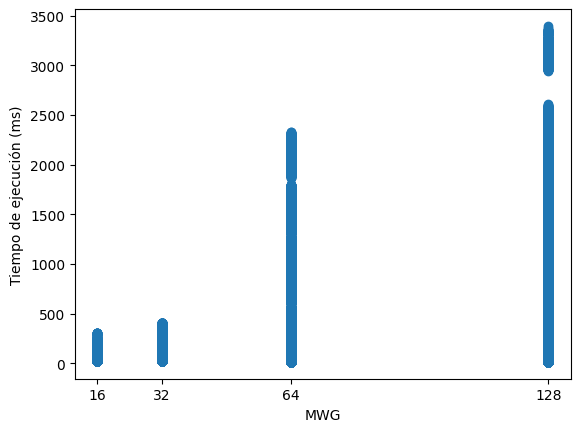

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo csv en un DataFrame de Pandas
df = final_df

# Selecciona las columnas con el tiempo de ejecución y el primer parámetro
data = df[['MWG', 'Time (ms)']]

# Crea un gráfico de dispersión
plt.scatter(data['MWG'], data['Time (ms)'])

# Establece las marcas del eje X
plt.xticks([16, 32, 64, 128])

# Agrega etiquetas a los ejes
plt.xlabel('MWG')
plt.ylabel('Tiempo de ejecución (ms)')

# Muestra el gráfico
plt.show()

Este código carga el archivo sgemm.csv en un DataFrame de Pandas y luego selecciona las columnas con el tiempo de ejecución y el primer parámetro (MWG). Luego, crea un gráfico de dispersión utilizando la función scatter de matplotlib y agrega etiquetas a los ejes utilizando las funciones xlabel y ylabel. Finalmente, muestra el gráfico utilizando la función show

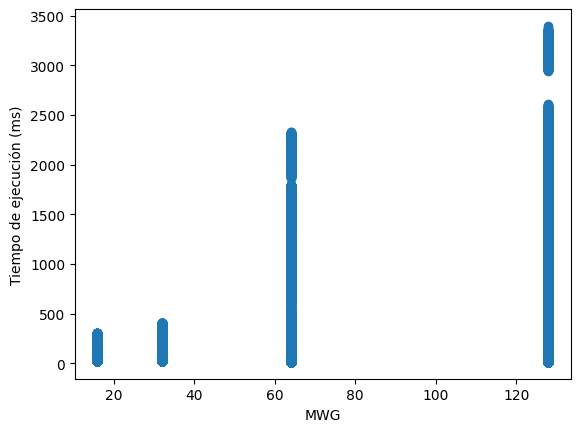

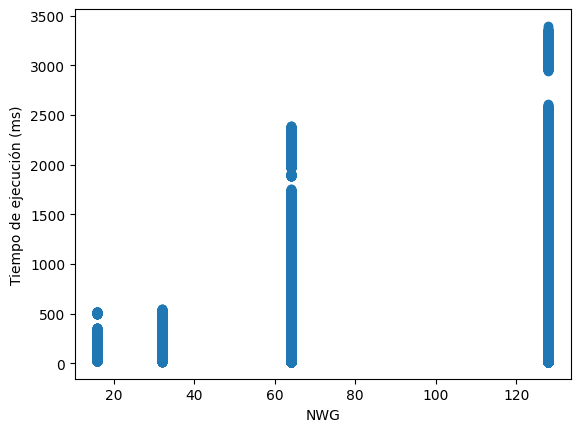

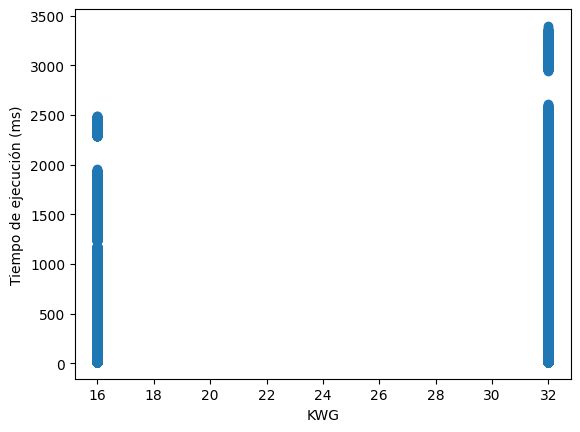

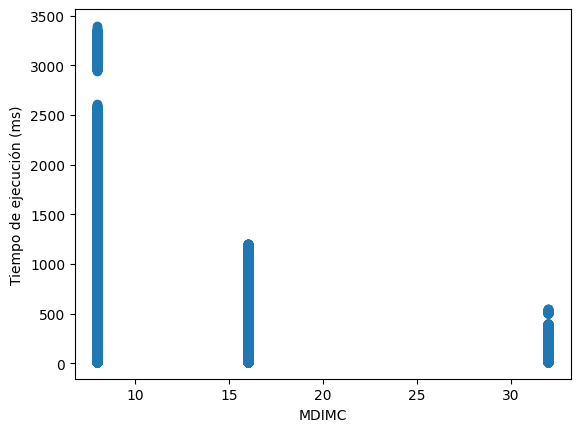

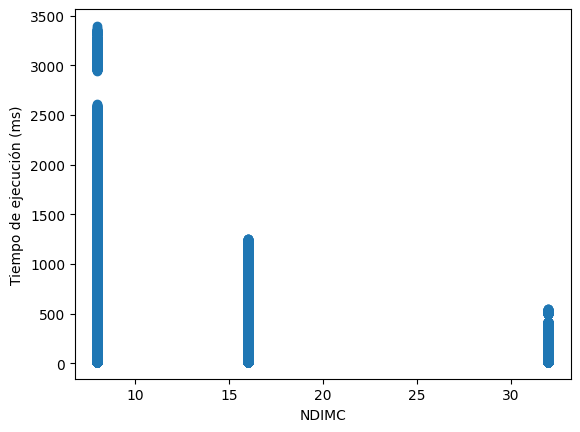

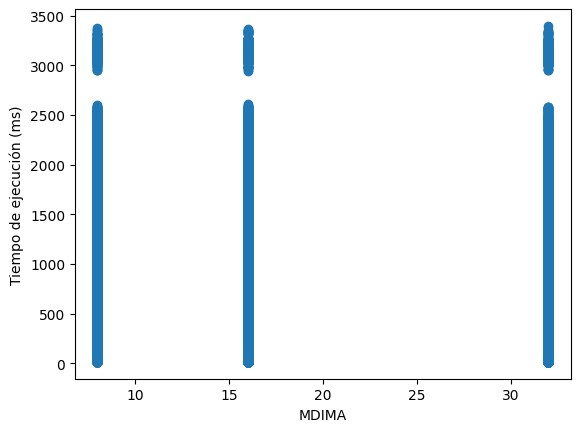

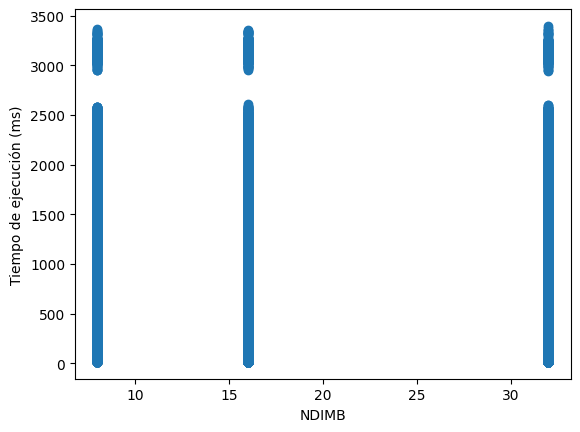

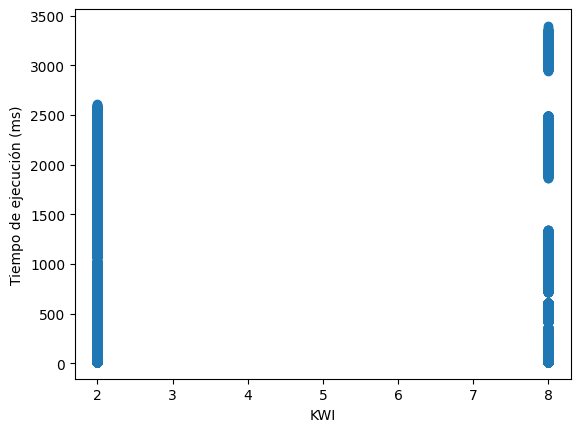

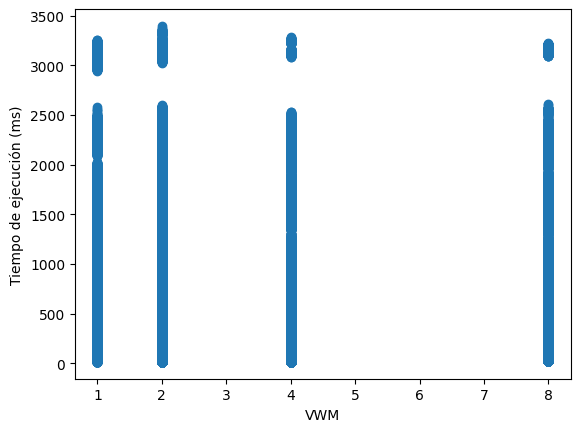

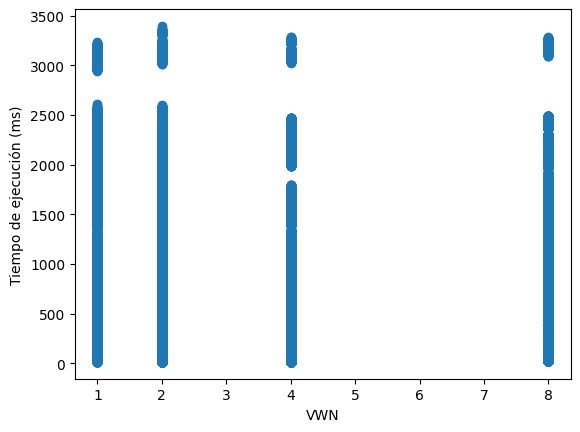

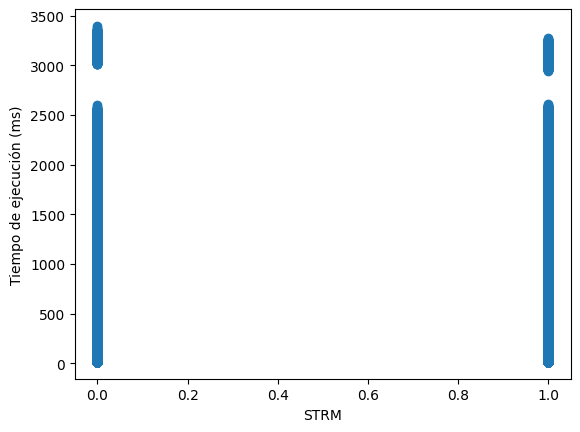

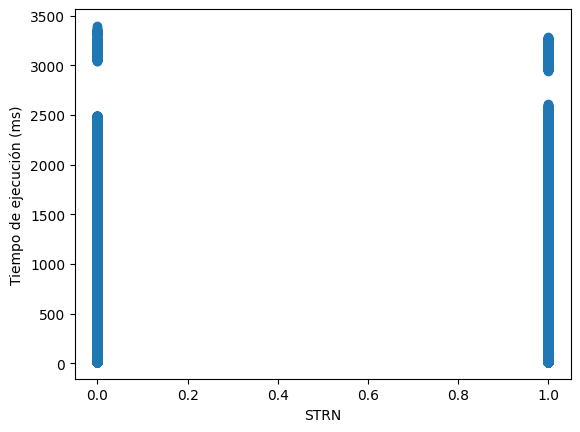

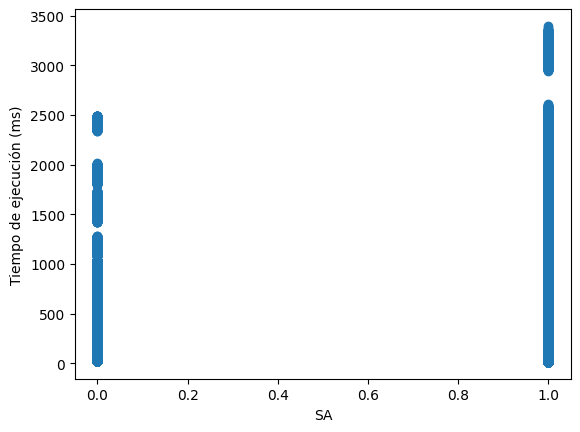

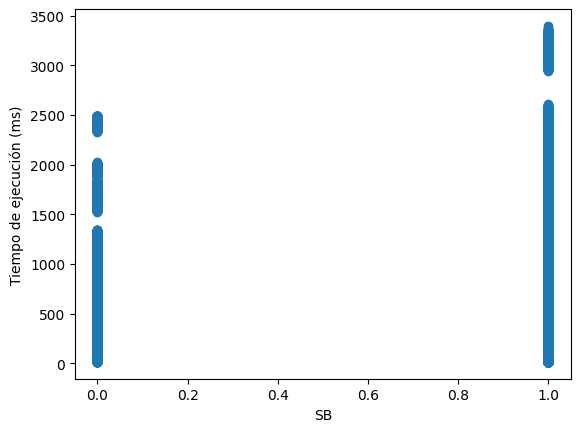

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo csv en un DataFrame de Pandas
df = final_df

# Número de parámetros
n_params = 14

# Etiquetas de los parámetros
param_labels = df.columns[:n_params]

# Crea un gráfico para cada parámetro
for i in range(n_params):
    # Selecciona las columnas con el tiempo de ejecución y el parámetro actual
    data = df.iloc[:, [i, 14]]

    # Crea un gráfico de dispersión
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1])

    # Agrega etiquetas a los ejes
    plt.xlabel(param_labels[i])
    plt.ylabel('Tiempo de ejecución (ms)')

    # Muestra el gráfico
    plt.show()


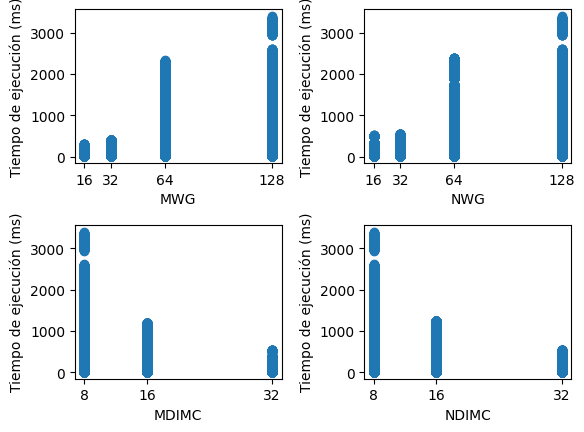

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo csv en un DataFrame de Pandas
df = final_df

# Etiquetas de los parámetros
param_labels = ['MWG', 'NWG', 'MDIMC', 'NDIMC']

# Marcas del eje X para cada parámetro
xticks = [[16, 32, 64, 128], [16, 32, 64, 128], [8, 16, 32], [8, 16, 32]]

# Crea una figura con varios ejes
fig, axs = plt.subplots(2, 2)

# Ajusta los márgenes entre los gráficos
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Crea un gráfico para cada parámetro
for i in range(4):
    # Selecciona las columnas con el tiempo de ejecución y el parámetro actual
    data = df[[param_labels[i], 'Time (ms)']]

    # Crea un gráfico de dispersión en el eje correspondiente
    axs[i // 2, i % 2].scatter(data.iloc[:, 0], data.iloc[:, 1])

    # Establece las marcas del eje X
    axs[i // 2, i % 2].set_xticks(xticks[i])

    # Agrega etiquetas a los ejes
    axs[i // 2, i % 2].set_xlabel(param_labels[i])
    axs[i // 2, i % 2].set_ylabel('Tiempo de ejecución (ms)')

# Muestra la figura
plt.show()

# Análisis factorial

In [ ]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis

df = final_df
# Selecciona las columnas con las variables independientes
X = df.iloc[:, 0:14]

for n in range(4):
  # Crea una instancia de FactorAnalysis
  fa = FactorAnalysis(n_components=n)

  # Ajusta el modelo a los datos
  fa.fit(X)

  # Muestra los pesos de los factores
  print(fa.components_)

[[-2.91702419e+01 -3.08665022e+01 -1.03235044e-01 -5.22849217e-01
  -5.58854163e-01 -1.12545060e+00 -1.17932251e+00 -1.28997653e-14
  -4.73538158e-01 -5.01166954e-01 -5.73208322e-15  6.39856776e-16
  -3.82506221e-15 -3.89620371e-15]
 [-3.08489963e+01  2.91517197e+01 -2.91361157e-03 -6.52127721e-01
   6.21519429e-01 -9.87726077e-01  9.22454778e-01  1.99128395e-13
  -5.03796945e-01  4.76165068e-01  8.82578274e-14 -9.77452857e-15
   5.89502433e-14  5.98003715e-14]
 [-1.87958122e-03  3.02579235e-04 -3.87128498e-01 -2.81377931e+00
  -1.40080681e-01 -5.04399360e+00 -1.50151663e+00 -2.35436494e-03
   8.97760978e-01  1.23446901e-01 -1.04357520e-03  1.15764228e-04
  -6.97166000e-04 -7.06887880e-04]]


In [ ]:
from sklearn.cluster import KMeans

# Select the columns containing the data you want to cluster
data = sgemm_df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']]

# Create a k-means model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# Add the cluster assignments to the original DataFrame
sgemm_df['Cluster'] = clusters

# Print the first 5 rows of the updated DataFrame
print(sgemm_df.head())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  Mean Run (ms)  Cluster  
0   0     115.26     115.87     118.55     115.80       116.3700        0  
1   1      78.13      78.25      79.25      79.19        78.7050        0  
2   0      79.84      80.69      80.76      80.97        80.5650        0  
3   1      84.32      89.90      86.75      85.58        86.6375        0  
4   0     115.13     121.98     122.73     114.81       118.6625        0  


It’s possible for a dataset to have multiple peaks or modes, which can indicate that the data is a mixture of several underlying distributions. In your case, if the histogram of the logarithms of the runs appears to have multiple peaks, it could suggest that your data is a mixture of several normal distributions.

One way to model this type of data is to use a mixture model, which assumes that the data is generated by a mixture of several underlying distributions. In your case, you could use a Gaussian mixture model to represent your data as a mixture of several normal distributions. This type of model can be fit to your data using an algorithm such as the Expectation-Maximization (EM) algorithm.

Once you have fit a Gaussian mixture model to your data, you can use it to estimate the parameters of the underlying normal distributions, such as their means and standard deviations. This can provide more insight into the structure of your data and help you understand why it appears to have multiple peaks.

A Gaussian mixture model is a probabilistic model that represents a dataset as a mixture of several Gaussian (normal) distributions. Each Gaussian distribution in the mixture represents a different subpopulation or cluster within the data. The model assumes that each data point is generated by one of the Gaussian distributions, with the probability of belonging to each distribution determined by a set of mixing weights.

The parameters of a Gaussian mixture model include the means, variances (or covariances), and mixing weights of the Gaussian distributions. These parameters can be estimated from the data using an algorithm such as the Expectation-Maximization (EM) algorithm. The EM algorithm iteratively estimates the parameters of the model by alternating between two steps: an expectation step, where the posterior probabilities of each data point belonging to each Gaussian distribution are calculated, and a maximization step, where the parameters of the Gaussian distributions are updated to maximize the likelihood of the data given the current posterior probabilities.

Once you have fit a Gaussian mixture model to your data, you can use it to estimate the parameters of the underlying Gaussian distributions and to assign each data point to one of the clusters represented by these distributions. This can provide more insight into the structure of your data and help you understand why it appears to have multiple peaks.




Here an example using 3 components:

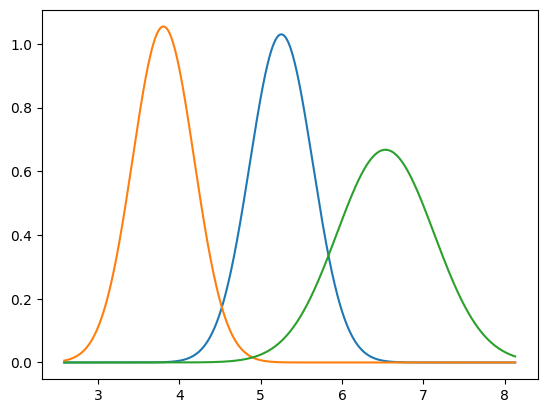

In [ ]:
from sklearn.mixture import GaussianMixture
from scipy import stats

# Reshape the data to have shape (n_samples, n_features)
X = log_values.reshape(-1, 1)

# Create a Gaussian mixture model with 3 components
gm = GaussianMixture(n_components=3)

# Fit the model to the data
gm.fit(X)

# Get the means and covariances of the fitted model
means = gm.means_
covariances = gm.covariances_

# Plot the fitted model
x = np.linspace(log_values.min(), log_values.max(), 1000)
for i in range(3):
    plt.plot(x, stats.norm.pdf(x, means[i], np.sqrt(covariances[i])).ravel())
plt.show()


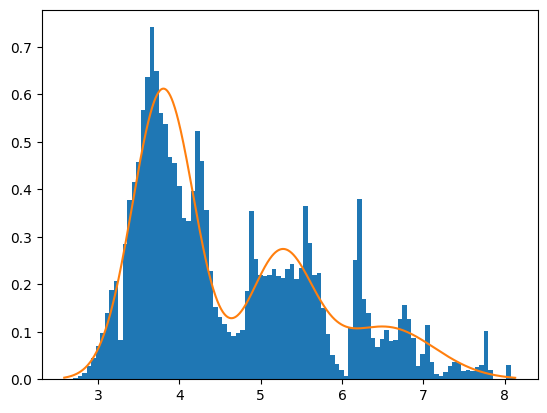

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = sgemm_df

# Concatenate the values from the last 4 columns into a single array
values = np.concatenate([df['Run1 (ms)'].values, df['Run2 (ms)'].values, df['Run3 (ms)'].values, df['Run4 (ms)'].values])

# Compute the logarithm of the values
log_values = np.log(values)

# Plot the histogram of the logarithms of the runs
plt.hist(log_values, bins=100, density=True)

# Reshape the data to have shape (n_samples, n_features)
X = log_values.reshape(-1, 1)

# Create a Gaussian mixture model with 3 components
gm = GaussianMixture(n_components=3)

# Fit the model to the data
gm.fit(X)

# Plot the Gaussian mixture model on top of the histogram
x = np.linspace(log_values.min(), log_values.max(), 1000)
y = np.exp(gm.score_samples(x.reshape(-1, 1)))
plt.plot(x, y)

# Show the plot
plt.show()


You can obtain the weights of each component in your Gaussian mixture model using the weights_ attribute of the fitted model. Here’s an example code snippet that shows how to do this:



In [ ]:
sgemm_df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

One way to determine the optimal number of components for a Gaussian mixture model is to use a model selection criterion such as the Bayesian Information Criterion (BIC) or the Akaike Information Criterion (AIC). These criteria balance the fit of the model to the data against the complexity of the model (i.e., the number of components).

Here’s an example of how you can use the BIC to compare Gaussian mixture models with different numbers of components:

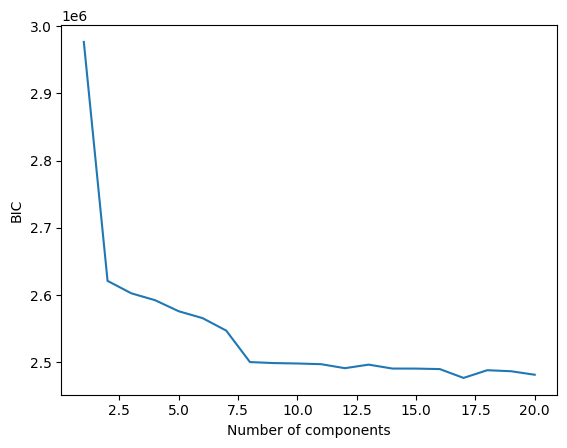

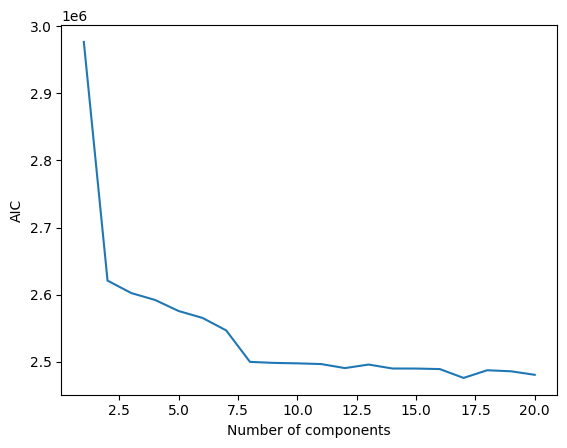

In [ ]:
from sklearn.mixture import GaussianMixture

# Reshape the data to have shape (n_samples, n_features)
X = log_values.reshape(-1, 1)

# Create a list to store the BIC values for different numbers of components
bic_values = []
# Create a list to store the AIC values for different numbers of components
aic_values = []

num_components = 20

# Try different numbers of components
for n_components in range(1, num_components+1):
    # Create a Gaussian mixture model with n_components
    gm = GaussianMixture(n_components=n_components)
    
    # Fit the model to the data
    gm.fit(X)
    
    # Compute the BIC of the fitted model
    bic = gm.bic(X)
    aic = gm.aic(X)
    
    # Append the BIC value to the list
    bic_values.append(bic)
    aic_values.append(aic)


# Plot the BIC values
plt.plot(range(1, num_components+1), bic_values)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.show()

# Plot the AIC values
plt.plot(range(1, num_components+1), aic_values)
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.show()

This code fits Gaussian mixture models with different numbers of components to your data and computes the BIC of each fitted model. The BIC values are then plotted as a function of the number of components. You can choose the number of components that gives the lowest BIC value as the optimal number.


You can plot the fitted Gaussian mixture model and the histogram of your data together using the hist and plot functions from the matplotlib.pyplot module. Here’s an example of how you can do this:

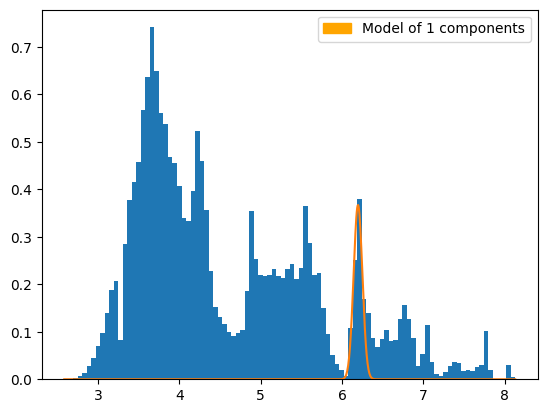

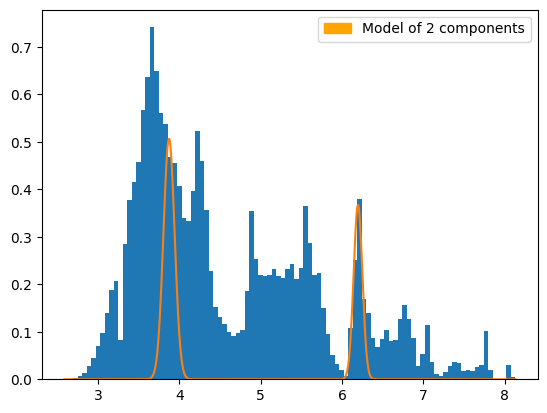

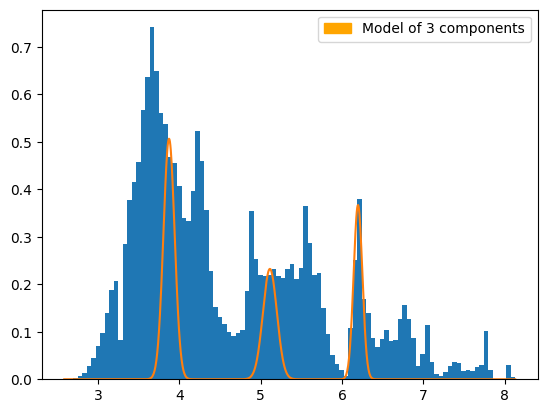

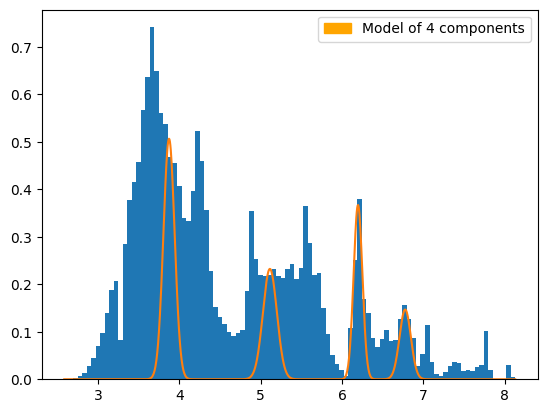

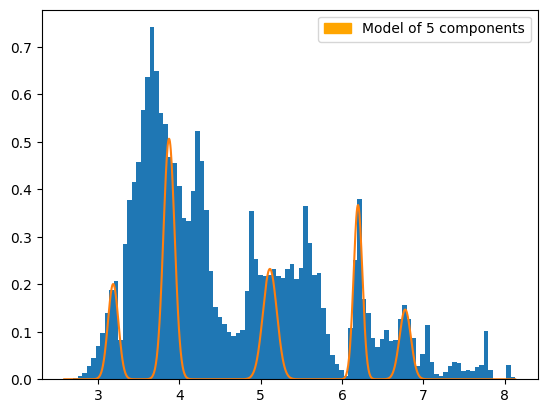

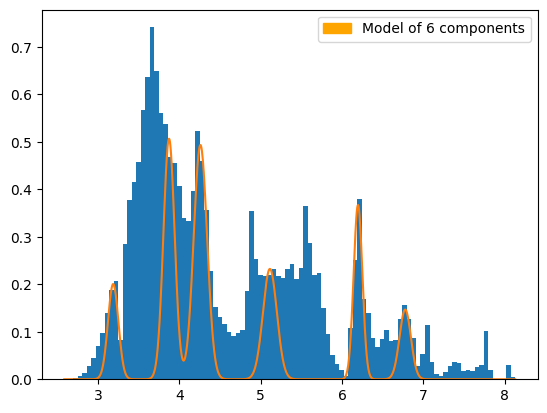

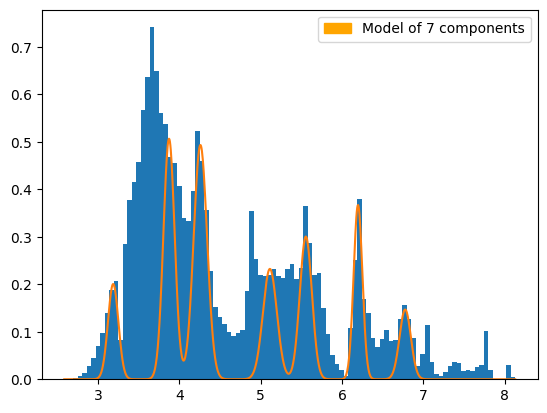

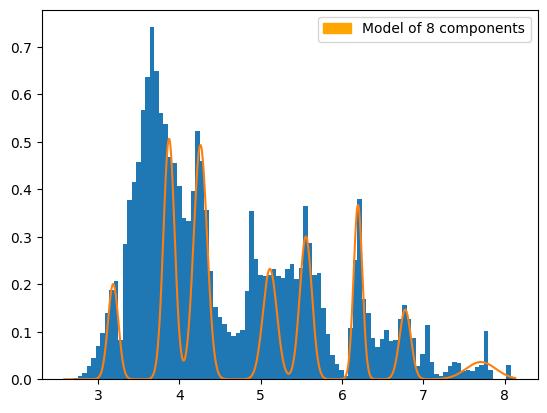

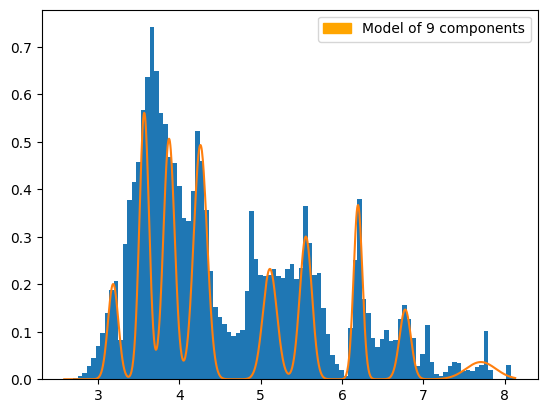

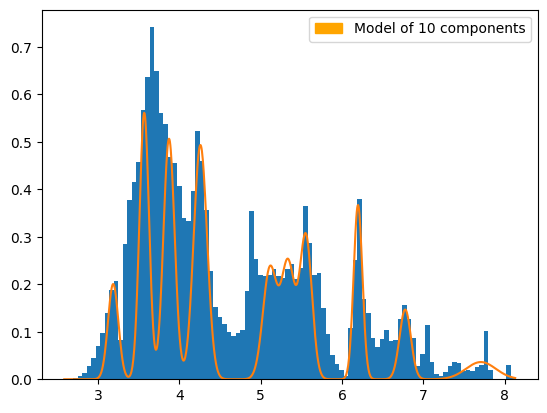

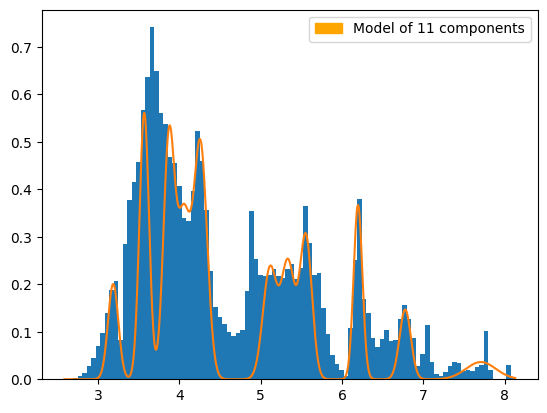

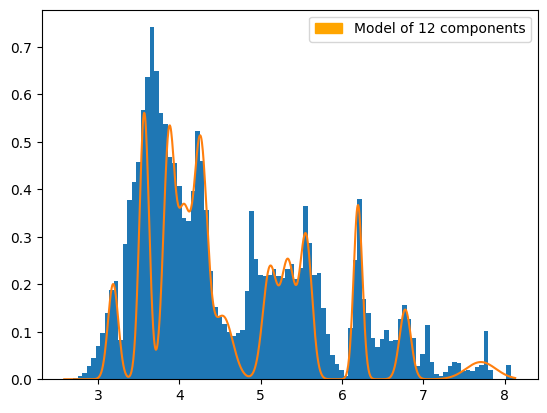

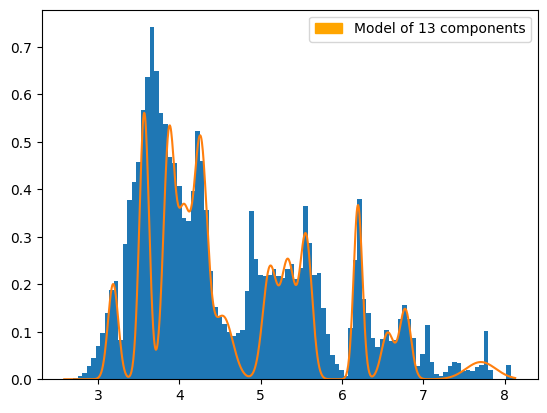

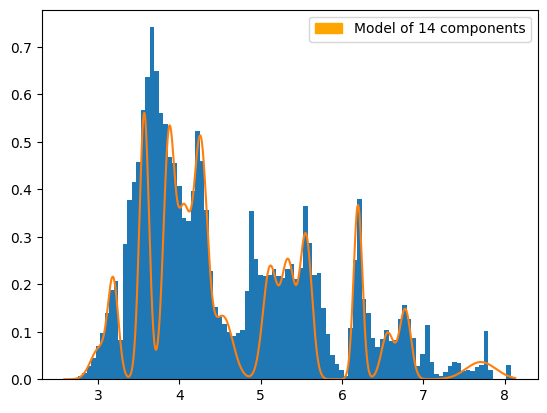

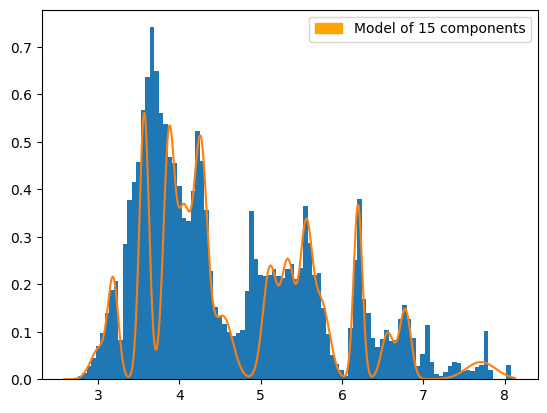

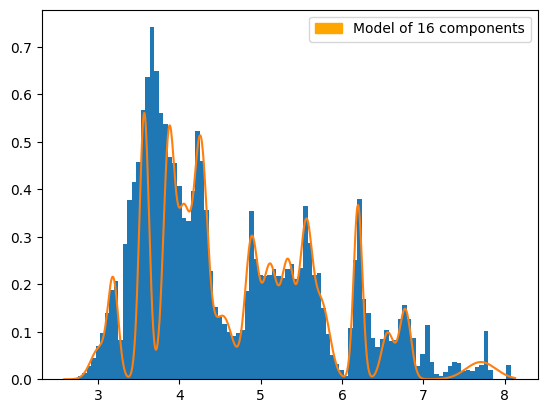

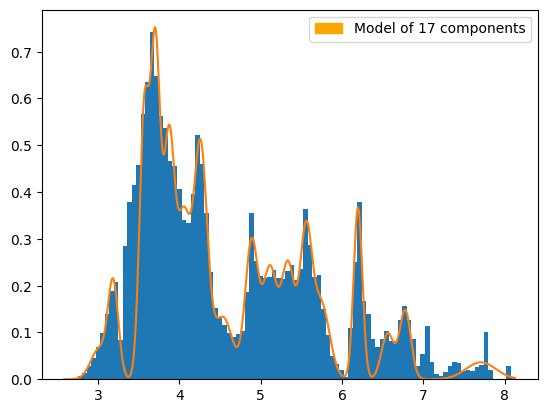

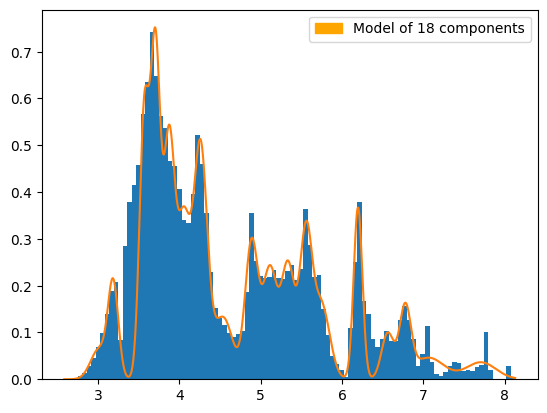

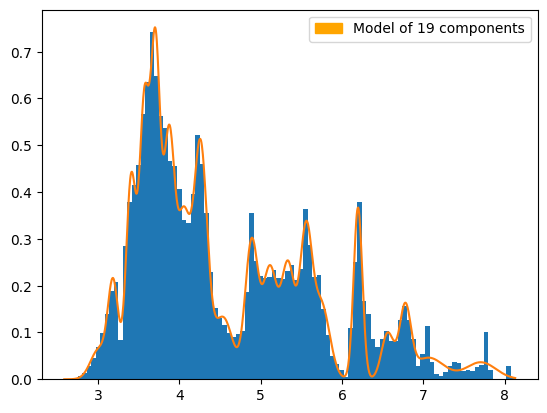

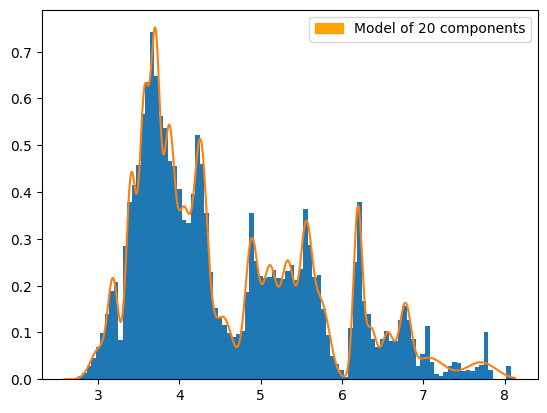

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Evaluate the fitted model at a range of values
x = np.linspace(log_values.min(), log_values.max(), 1000)
pdf = np.zeros_like(x)
for i in range(gm.n_components):
    # Plot the histogram of the data
    plt.hist(log_values, bins=100, density=True)
    pdf += gm.weights_[i] * stats.norm.pdf(x, gm.means_[i], np.sqrt(gm.covariances_[i].ravel()))
    # Plot the fitted model
    plt.plot(x, pdf)
    plt.legend(handles=[mpatches.Patch(color='orange', label='Model of '+str(i+1)+' components')])
    # Show the plot
    plt.show()

This code first plots a histogram of your data using the hist function. The density=True argument ensures that the histogram is normalized so that it represents a probability density.

Next, the code evaluates the fitted Gaussian mixture model at a range of values using the pdf method of the stats.norm object from the scipy.stats module. The probability density function of each component is weighted by its corresponding weight in the mixture and summed to obtain the overall probability density function of the mixture.

Finally, the code plots the probability density function of the fitted model using the plot function and shows the resulting plot using the show function.



Cross-validation is a technique that can be used to estimate the performance of a model on unseen data. In k-fold cross-validation, the data is split into k subsets of roughly equal size. The model is trained on k-1 of these subsets and evaluated on the remaining subset. This process is repeated k times, with each subset serving as the validation set once.

Here’s an example of how you can perform 5-fold cross-validation with your Gaussian mixture model:

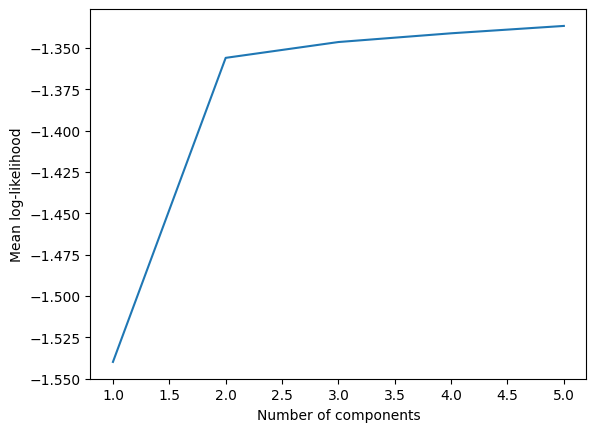

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import KFold

# Reshape the data to have shape (n_samples, n_features)
X = log_values.reshape(-1, 1)

# Create a KFold object for 5-fold cross-validation with shuffling
kf = KFold(n_splits=5, shuffle=True)

# Create a list to store the mean log-likelihood values for different numbers of components
mean_log_likelihoods = []

num_components = 5

# Try different numbers of components
for n_components in range(1, num_components+1):
    # Create a Gaussian mixture model with n_components
    gm = GaussianMixture(n_components=n_components)
    
    # Create a list to store the log-likelihood values for each fold
    log_likelihoods = []
    
    # Perform 5-fold cross-validation
    for train_index, test_index in kf.split(X):
        # Split the data into training and test sets
        X_train = X[train_index]
        X_test = X[test_index]
        
        # Fit the model to the training data
        gm.fit(X_train)
        
        # Compute the log-likelihood of the test data
        log_likelihood = gm.score(X_test)
        
        # Append the log-likelihood value to the list
        log_likelihoods.append(log_likelihood)
    
    # Calculate the mean log-likelihood across all folds
    mean_log_likelihood = np.mean(log_likelihoods)
    
    # Append the mean log-likelihood value to the list
    mean_log_likelihoods.append(mean_log_likelihood)

# Plot the mean log-likelihood values for different numbers of components
plt.plot(range(1, num_components+1), mean_log_likelihoods)
plt.xlabel('Number of components')
plt.ylabel('Mean log-likelihood')
plt.show()

This will perform 5-fold cross-validation with your Gaussian mixture model and calculate the mean log-likelihood across all folds. The log-likelihood measures how well the model fits the data. A higher value indicates a better fit.

Es posible utilizar los datos de tu conjunto de datos para ajustar un modelo de regresión que pueda predecir el tiempo de ejecución en función de los valores de los parámetros. Hay muchas formas diferentes de hacer esto y el código específico dependerá del tipo de modelo de regresión que quieras utilizar y de cómo quieras procesar los datos.

Aquí tienes un ejemplo de código que muestra cómo ajustar un modelo de regresión lineal utilizando la biblioteca scikit-learn para predecir el tiempo de ejecución en función de los valores de los parámetros:



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

# Load the data from the CSV file
df = sgemm_df
df = shuffle(df)

# Select the independent and dependent variables
X = df.iloc[:, :14]
y = df.iloc[:, 14:].mean(axis=1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

neg_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# Compute the mean squared error
mse = -neg_mse_scores.mean()

# Compute the root mean squared error
rmse = np.sqrt(mse)

# Print the mean squared error
print('Mean squared error:', mse)

# Print the root mean squared error
print('Root mean squared error:', rmse)

# Print the mean R^2 score
print('Mean R^2 score:', neg_mse_scores.mean())

# Print the coefficients of the model
print('Coefficients:', model.coef_)


Mean squared error: 80588.09215724588
Root mean squared error: 283.880418763334
Mean R^2 score: -80588.09215724588
Coefficients: [  3.33014166   3.07500658   5.19460475 -16.7022821  -16.3666086
   1.03384797   1.04561283   4.00350439  -1.50958509  -3.02459402
  -9.28215391  -0.07956409  38.3315453   47.17231273]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load the data from the CSV file
df = sgemm_df
df = shuffle(df)

# Select the independent and dependent variables
X = df.iloc[:, [0, 1, 3, 4]]

y = df.iloc[:, 14:].mean(axis=1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

neg_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# Compute the mean squared error
mse = -neg_mse_scores.mean()

# Compute the root mean squared error
rmse = np.sqrt(mse)

# Print the mean squared error
print('Mean squared error:', mse)
# Print the root mean squared error
print('Root mean squared error:', rmse)
# Print the mean R^2 score
print('Mean R^2 score:', neg_mse_scores.mean())

# Print the coefficients of the model
print('Coefficients:', model.coef_)

Mean squared error: 83346.50923316009
Root mean squared error: 288.697955020745
Mean R^2 score: -83346.50923316009
Coefficients: [  3.32773765   3.0469899  -15.21892621 -14.82398721]


No es buena por la distribución de los datos. No se puede usar regresión lineal.

Sí, puedes utilizar validación cruzada para evaluar la calidad del ajuste de un modelo de regresión basado en Random Forest a tus datos. Aquí tienes un ejemplo de código que muestra cómo hacer esto utilizando la biblioteca scikit-learn y validación cruzada de 5 particiones:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Load the data from the CSV file
df = sgemm_df
df = shuffle(df)

# Select the independent and dependent variables
X = df.iloc[:, :14]
y = df.iloc[:, 14:].mean(axis=1)

# Create a Random Forest regression model
model = RandomForestRegressor()

# Compute the cross-validated negative mean squared error scores
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Compute the mean squared error
mse = -scores.mean()

# Compute the root mean squared error
rmse = np.sqrt(mse)

# Print the mean squared error
print('Mean squared error:', mse)

# Print the root mean squared error
print('Root mean squared error:', rmse)


Mean squared error: 15.421666300631088
Root mean squared error: 3.9270429461149376


In [ ]:
# Create a new DataFrame from the values array
values_df = pd.DataFrame(values)

# Use the describe method on the new DataFrame
values_df.describe()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Concatenate the values from the last 4 columns into a single array
values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])

# Calculate the positions of the bin edges
num_bins = 10
bin_edges = np.histogram_bin_edges(values, bins=num_bins)

# Create a histogram of the values
plt.hist(values, bins=bin_edges)

# Set the x-ticks to the positions of the bin edges
plt.xticks(bin_edges)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Concatenate the values from the last 4 columns into a single array
values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])

# Calculate the positions of the bin edges
num_bins = 10
bin_edges = np.histogram_bin_edges(values, bins=num_bins)

# Calculate the histogram values
hist_values, _ = np.histogram(values, bins=bin_edges)

# Create a histogram of the values
plt.hist(values, bins=bin_edges)

# Set the x-ticks to the positions of the bin edges
plt.xticks(bin_edges)

# Add text annotations to show the number of samples in each bin
for x, y in zip(bin_edges[:-1], hist_values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Concatenate the values from the last 4 columns into a single array
values = np.concatenate([sgemm_df['Run1 (ms)'].values, sgemm_df['Run2 (ms)'].values, sgemm_df['Run3 (ms)'].values, sgemm_df['Run4 (ms)'].values])

# Filter the values to only include those that are less than or equal to 352
filtered_values = values[values <= 63]

# Calculate the positions of the bin edges
num_bins = 10
bin_edges = np.histogram_bin_edges(filtered_values, bins=num_bins)

# Create a histogram of the values
plt.hist(filtered_values, bins=bin_edges)

# Set the x-ticks to the positions of the bin edges
plt.xticks(bin_edges)

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('MWG')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'MWG = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('NWG')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'NWG = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('KWG')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'KWG = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('MDIMC')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'MDIMC = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('NDIMC')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'NDIMC = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('MDIMA')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'MDIMA = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('NDIMB')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'NDIMB = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('KWI')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'KWI = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('VWM')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'VWM = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('VWN')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'VWN = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('STRM')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'STRM = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('STRN')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'STRN = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('SA')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'SA = {group_name}')
    
    # Show the histogram
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Group the data by the desired column
grouped_data = sgemm_df.groupby('SB')

# Specify the desired bin edges
bin_edges = np.arange(0, 1000, 100)

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values
    plt.hist(values, bins=bin_edges)
    
    # Add a title to the histogram
    plt.title(f'SB = {group_name}')
    
    # Show the histogram
    plt.show()

De los histogramas anteriores se desprende que los mejores valores para cada uno de los parámetros (de manera individual) son:

- MWG = 64.
- NWG = 64.
- KWG = 32.
- MDIMC = 8.
- NDIMC = 8.
- MDIMA = 16.
- NDIMB = 16.
- KWI, no hay diferencias.
- VWM = 1.
- VWN = 1.
- STRM = 1
- STRN, no hay diferencias.
- SA = 1
- SB, hay poca diferencia.



Según esta matriz de correlación, se puede observar una correlación moderada positiva entre la variable MWG y VWM. Lo mismo entre NWG y VWN.

In [ ]:
import matplotlib.pyplot as plt

# Specify the desired range for the x-axis
x_min = 0
x_max = 1000

# Group the data by the desired columns
grouped_data = sgemm_df.groupby(['MWG', 'VWM'])

# Create a separate histogram for each group
for group_name, group_data in grouped_data:
    # Concatenate the values from the last 4 columns into a single array
    values = np.concatenate([group_data['Run1 (ms)'].values, group_data['Run2 (ms)'].values, group_data['Run3 (ms)'].values, group_data['Run4 (ms)'].values])
    
    # Create a histogram of the values with the specified range for the x-axis
    plt.hist(values, range=(x_min, x_max))
    
    # Add a title to the histogram
    plt.title(f'MWG = {group_name[0]}, VWM = {group_name[1]}')
    
    # Show the histogram
    plt.show()
    import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
from scipy import stats

data = sgemm_df
# Select the columns for the independent and dependent variables
ivs = data.columns[:14]
dvs = data.columns[14:]

# Perform ANOVA for each independent variable
for iv in ivs:
    print(f'Performing ANOVA for {iv}')
    groups = [data[data[iv] == val][dvs] for val in data[iv].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    print(f'F-value: {f_val}')
    print(f'p-value: {p_val}')

Según los resultados anteriores, la variable STRN no tiene un efecto significativo en los valores de ejecución (tal y como ya vimos al evaluar los histogramas).

Sin embargo, si no asumimos que los datos siguen la normal, tal y como hemos visto en los histogramas, deberíamos hacer otro test distinto, como Kruskal Willis.

In [ ]:
import pandas as pd
from scipy.stats import kruskal


# Perform Kruskal-Wallis test for each independent variable
for iv in ivs:
    print(f'Performing Kruskal-Wallis test for {iv}')
    groups = [data[data[iv] == val][dvs] for val in data[iv].unique()]
    h_val, p_val = kruskal(*groups)
    print(f'H-value: {h_val}')
    print(f'p-value: {p_val}')

Los resultados de la prueba de Kruskal-Wallis muestran el valor H y el valor p para cada variable independiente (característica) en el conjunto de datos. El valor H es similar al valor F en ANOVA y mide la relación entre la varianza entre grupos y la varianza dentro de los grupos. Un valor H grande indica que hay más varianza entre grupos que dentro de los grupos, lo que sugiere que la variable independiente tiene un efecto significativo en la variable dependiente. El valor p indica la probabilidad de observar un resultado tan extremo como el obtenido si la hipótesis nula (que todas las medianas de grupo son iguales) fuera verdadera. Un valor p pequeño (generalmente menor a 0.05) indica que hay una diferencia significativa entre las medianas de grupo y que la variable independiente tiene un efecto significativo en la variable dependiente.

En los resultados, todas las variables independientes excepto KWG tienen valores p muy pequeños (cercanos a 0), lo que indica que tienen un efecto significativo en el tiempo de ejecución. KWG tiene un valor p más grande (mayor a 0.05), lo que indica que no tiene un efecto significativo en el tiempo de ejecución. Esto significa que todas las características excepto KWG son significativas para explicar la varianza en el tiempo de ejecución.

Es importante tener en cuenta que estos resultados se basan en una única prueba de Kruskal-Wallis.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Selecciona las columnas que contienen tus variables independientes y tu variable dependiente
X = sgemm_df[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']]
y = sgemm_df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)

# Crea un modelo de regresión lineal
model = LinearRegression()

# Ajusta el modelo a tus datos
model.fit(X, y)

# Obtén los coeficientes de regresión
print(model.coef_)

# Realiza una predicción
predicted_gpu_time = model.predict([[48, 48, 16, 8, 8, 16, 16, 2, 1, 1, 1, 1, 1, 1]])

To create a linear regression model to predict the GPU runtime, you can use the LinearRegression class from the sklearn.linear_model module.

In [ ]:
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
sgemm_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sgemm_product.csv')

# Create a new column with the average runtime
sgemm_df['avg_runtime'] = sgemm_df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)

# Define the feature columns
feature_cols = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']

# Define the target column
target_col = 'avg_runtime'

# Extract the feature matrix and target vector
X = sgemm_df[feature_cols].values
y = sgemm_df[target_col].values

# Create a LinearRegression object
lr = LinearRegression()

# Fit the model to the data
lr.fit(X, y)

# Print the coefficients of the fitted model
print(f'Intercept: {lr.intercept_:.2f}')
for feature, coef in zip(feature_cols, lr.coef_):
    print(f'{feature}: {coef:.2f}')

This will create a linear regression model to predict the average GPU runtime based on the 14 parameters in your dataset. The fit method will estimate the coefficients of the linear regression model using ordinary least squares. You can use the predict method of the fitted model to make predictions on new data.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load the data into a pandas dataframe
sgemm_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/sgemm_product.csv')

# Create a new column with the average runtime
sgemm_df['avg_runtime'] = sgemm_df[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)

# Define the feature columns
feature_cols = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']

# Define the target column
target_col = 'avg_runtime'

# Extract the feature matrix and target vector
X = sgemm_df[feature_cols].values
y = sgemm_df[target_col].values

# Create a LinearRegression object
lr = LinearRegression()

# Create a KFold object for 5-fold cross-validation
kf = KFold(n_splits=5)

# Create a list to store the mean squared error values for each fold
mse_values = []

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    # Fit the model to the training data
    lr.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = lr.predict(X_test)
    
    # Compute the mean squared error of the predictions
    mse = mean_squared_error(y_test, y_pred)
    
    # Append the mean squared error value to the list
    mse_values.append(mse)

# Calculate the mean mean squared error across all folds
mean_mse = np.mean(mse_values)

print(f'Mean MSE: {mean_mse:.2f}')

A mean MSE of 112459.81 means that, on average, your linear regression model’s predictions are off by about sqrt(112459.81) = 335.35 milliseconds.